# EDA for Tel Aviv for Micro Mobility

* Check number of accidents per quarter
    * Compare to number of total accidents excluding micro mobility
    * Ratio of number accident
* Bicycle Path Length in relation to Quarter area.
    * Pearson Correlation between length of BP and number of accidents for each quarter
* Graph of number of accidents per quarter and total length of bicycle path in regards to time 
    * Normalize by population in Tel Aviv
    * Scatter plot x is length of BP, y number of accidents.
        * One general scatter plot
        * Each quarter a specific plot
    * Scatter plot but with accidents that are severe
* Compare BP length to streets length
* 

In [48]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

### Loading Quarters Data

In [49]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

oidrova  krova           dateimport     ShapeArea  \
0        1      1  01/12/2015 02:28:14  1.301654e+07   
1        2      2  01/12/2015 02:28:14  8.013404e+06   
2        3      3  01/12/2015 02:28:14  3.380430e+06   
3        4      4  01/12/2015 02:28:14  4.510255e+06   
4        5      6  01/12/2015 02:28:14  2.089044e+06   
5        6      9  01/12/2015 02:28:14  7.879856e+06   
6        7      5  01/12/2015 02:28:14  3.024297e+06   
7        8      8  01/12/2015 02:28:14  3.420996e+06   
8        9      7  01/12/2015 02:28:14  6.343551e+06   

                                            geometry  
0  POLYGON ((670795.655 3555762.452, 670797.577 3...  
1  POLYGON ((672021.029 3553364.492, 672014.690 3...  
2  POLYGON ((668311.070 3552547.701, 668311.229 3...  
3  POLYGON ((670771.828 3552544.564, 670771.584 3...  
4  POLYGON ((668160.048 3550196.192, 668162.425 3...  
5  POLYGON ((668811.121 3546980.368, 668808.698 3...  
6  POLYGON ((666698.783 3550619.396, 666701.339 3...  
7  POLYGON ((667954.133 3548820.374, 667956.725 3...  
8  POLYGON ((665854.540 3548193.053, 665868.137 3...

#### Plotting Quarters

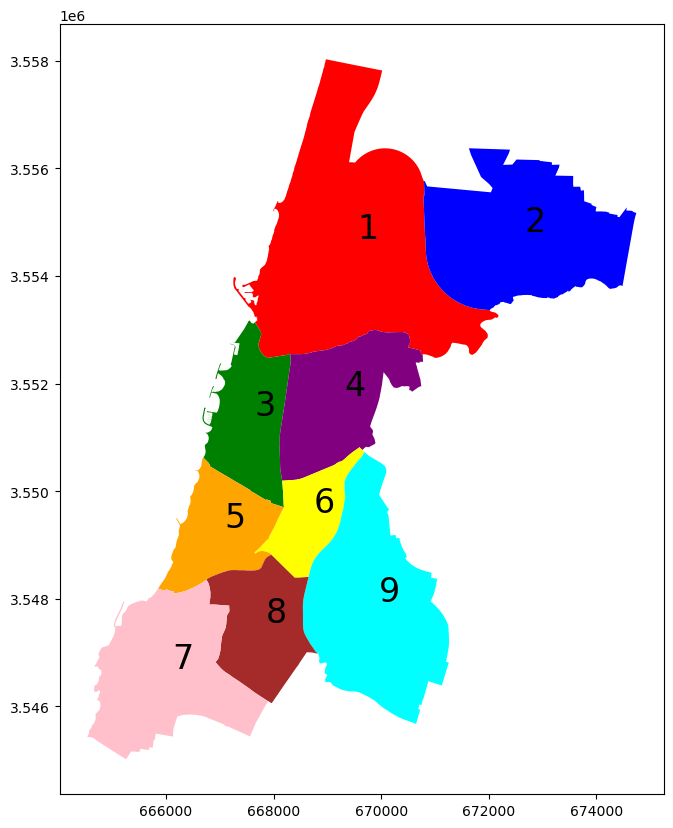

In [50]:
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()

### Loading TA Accidents and TA Micro Mobility Accidents

In [51]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [52]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

In [53]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [54]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

accident_id  provider_and_id  provider_code  file_type_police  \
41    2013001368      32013001368              3                 3   
50    2013001742      32013001742              3                 3   
131   2013001350      12013001350              1                 1   
196   2013000147      12013000147              1                 1   
197   2013000147      12013000147              1                 1   

     involved_type involved_type_hebrew  license_acquiring_date  age_group  \
41               2             נהג נפגע                       0          6   
50               2             נהג נפגע                       0          7   
131              2             נהג נפגע                       0          5   
196              2             נהג נפגע                       0          8   
197              2             נהג נפגע                       0          6   

    age_group_hebrew  sex  ... vehicle_attribution  \
41             25-29    1  ...                 1.0   
50             30-34    2  ...                 1.0   
131            20-24    1  ...                 1.0   
196            35-39    1  ...                 1.0   
197            25-29    1  ...                 1.0   

     vehicle_attribution_hebrew seats  total_weight total_weight_hebrew  \
41                       ישראלי  99.0           0.0             לא ידוע   
50                       ישראלי  99.0           0.0             לא ידוע   
131                      ישראלי  99.0           0.0             לא ידוע   
196                      ישראלי  99.0           0.0             לא ידוע   
197                      ישראלי  99.0           0.0             לא ידוע   

     vehicle_damage vehicle_damage_hebrew  urban_intersection  \
41              4.0               אין נזק                 NaN   
50              4.0               אין נזק                 NaN   
131             4.0               אין נזק                 NaN   
196             2.0                בינוני           9110323.0   
197             2.0                בינוני           9110323.0   

           accident_date                        geometry  
41   2013-07-27 01:00:00  POINT (667544.749 3549959.961)  
50   2013-10-07 01:30:00  POINT (667286.918 3548726.540)  
131  2013-08-25 01:00:00  POINT (667023.688 3548785.170)  
196  2013-09-19 00:00:00  POINT (668158.751 3551284.678)  
197  2013-09-19 00:00:00  POINT (668158.751 3551284.678)  

[5 rows x 162 columns]

#### Plotting accidents

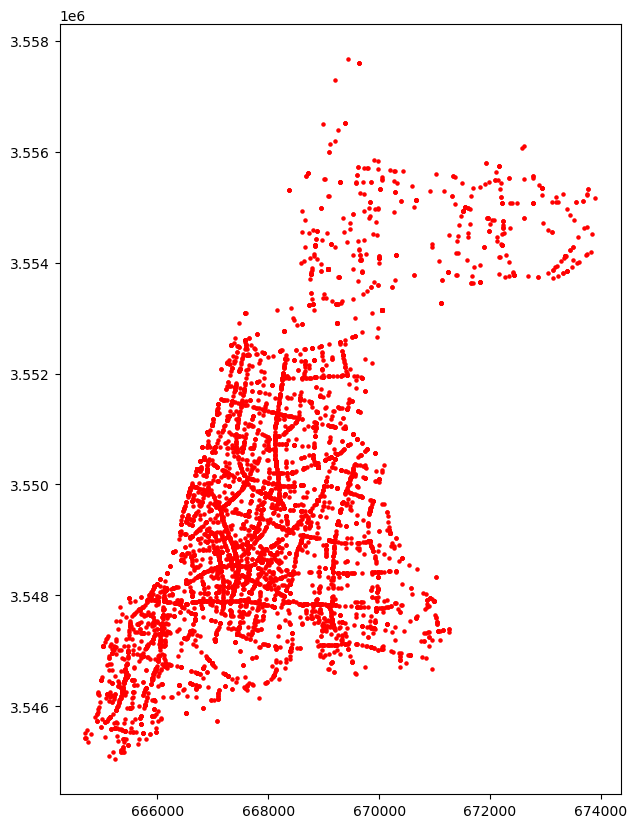

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
plt.show()

### Loading BP

In [56]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

oid_shvil  msorech           dateimport  create_year  \
0          1    95.10  14/08/2024 02:30:05         2012   
1          2   201.14  14/08/2024 02:30:05         2013   
2          3   696.31  14/08/2024 02:30:05         2004   
3          4   659.20  14/08/2024 02:30:05         2018   
4          5   362.67  14/08/2024 02:30:05         2018   

                                   shemmikta create_date  \
0                       נמיר מיוניצ'מן דרומה        None   
1                 פרופס מנמיר עד קדושי השואה        None   
2   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס        None   
3                   קק"ל מנמיר עד חיים לבנון        None   
4  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר        None   

                                            geometry  width direction  bitzua  \
0  LINESTRING (669823.985 3557373.860, 669855.549...    2.5   דו סטרי    2012   
1  LINESTRING (669232.834 3555478.027, 669169.381...    2.5   דו סטרי    2013   
2  LINESTRING (669232.637 3555478.023, 669249.025...    2.1   דו סטרי    2004   
3  LINESTRING (669354.261 3555417.055, 669410.178...    2.5   דו סטרי    2018   
4  LINESTRING (669946.350 3555344.516, 669962.261...    2.0   דו סטרי    2018   

  miflas date_created  
0   None         None  
1   None         None  
2   None         None  
3  מדרכה         None  
4   None   30/06/2018

#### Checking validity by lotting Quarters, Micro Mobility Accidents  and BP

In [57]:
i_m_h_ta_mm_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Plotting accidents with BP and Quarters

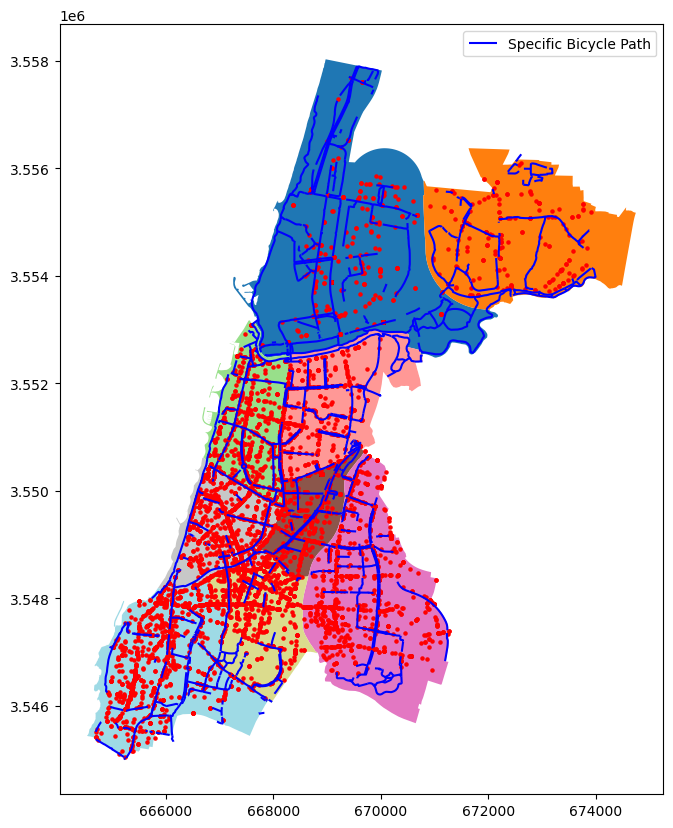

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, cmap='tab20', legend=True,)
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )

plt.legend()
plt.show()

## Loading streets data


In [59]:
ta_streets = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets

oidrechov  krechov      trechov         shemangli  mslamas  tsug  \
0           1.0    915.0  הרוגי מלכות   HARUGEY MALKHOT    336.0  רחוב   
1           2.0      0.0            0            UKNOWN      0.0  רחוב   
2           3.0    265.0      אמסטרדם         AMSTERDAM    516.0  רחוב   
3           4.0    644.0    אלון יגאל      YIG'AL ALLON   2524.0  רחוב   
4           5.0    634.0      מרגולין          MARGOLIN   2649.0  רחוב   
...         ...      ...          ...               ...      ...   ...   
8874     9851.0   3007.0   שבטי ישראל  SHIVTEY YISRA'EL   1983.0  רחוב   
8875     9852.0   3058.0  אבינרי יצחק           AVINERY   2027.0  רחוב   
8876     9853.0   3058.0  אבינרי יצחק           AVINERY   2027.0  רחוב   
8877     9855.0   3907.0         3907              None   1703.0  רחוב   
8878     9857.0     34.0        מטלון           MATALON   2327.0  רחוב   

      kkivun   UniqueId       shemarvit  kreka  \
0        0.0  507-10001       قتل مملكة  100.0   
1        3.0  507-10002            None  100.0   
2        1.0  507-10003        أمستردام  100.0   
3        0.0  507-10004      ألون ييغال  200.0   
4        1.0  507-10005        مارغولين  100.0   
...      ...        ...             ...    ...   
8874     0.0  507-17843   قبائل إسرائيل  100.0   
8875     0.0  507-20562  Avinri Yitzhak  100.0   
8876     0.0  507-20563  Avinri Yitzhak  100.0   
8877     0.0  507-21960            3907  100.0   
8878     0.0  507-21966         ميتالون  100.0   

                                               geometry  
0     LINESTRING (672865.880 3554095.253, 672895.216...  
1     LINESTRING (666990.498 3551436.940, 667065.337...  
2     LINESTRING (667879.712 3551424.162, 667940.741...  
3     LINESTRING (669570.036 3550420.535, 669581.404...  
4     LINESTRING (669329.153 3548322.758, 669409.403...  
...                                                 ...  
8874  LINESTRING (665771.816 3547023.159, 665760.256...  
8875  LINESTRING (665585.719 3547178.152, 665627.936...  
8876  LINESTRING (665700.142 3547064.296, 665759.119...  
8877  LINESTRING (665087.059 3546677.092, 665075.120...  
8878  LINESTRING (666917.433 3548291.622, 666930.486...  

[8879 rows x 11 columns]

#### Checking street length validity with google maps

In [60]:
ta_streets[ta_streets.shemangli == 'MARGOLIN'].geometry.length.sum()

690.5226685950398

#### Plotting streets with BP and MM Accidents and  Quarters

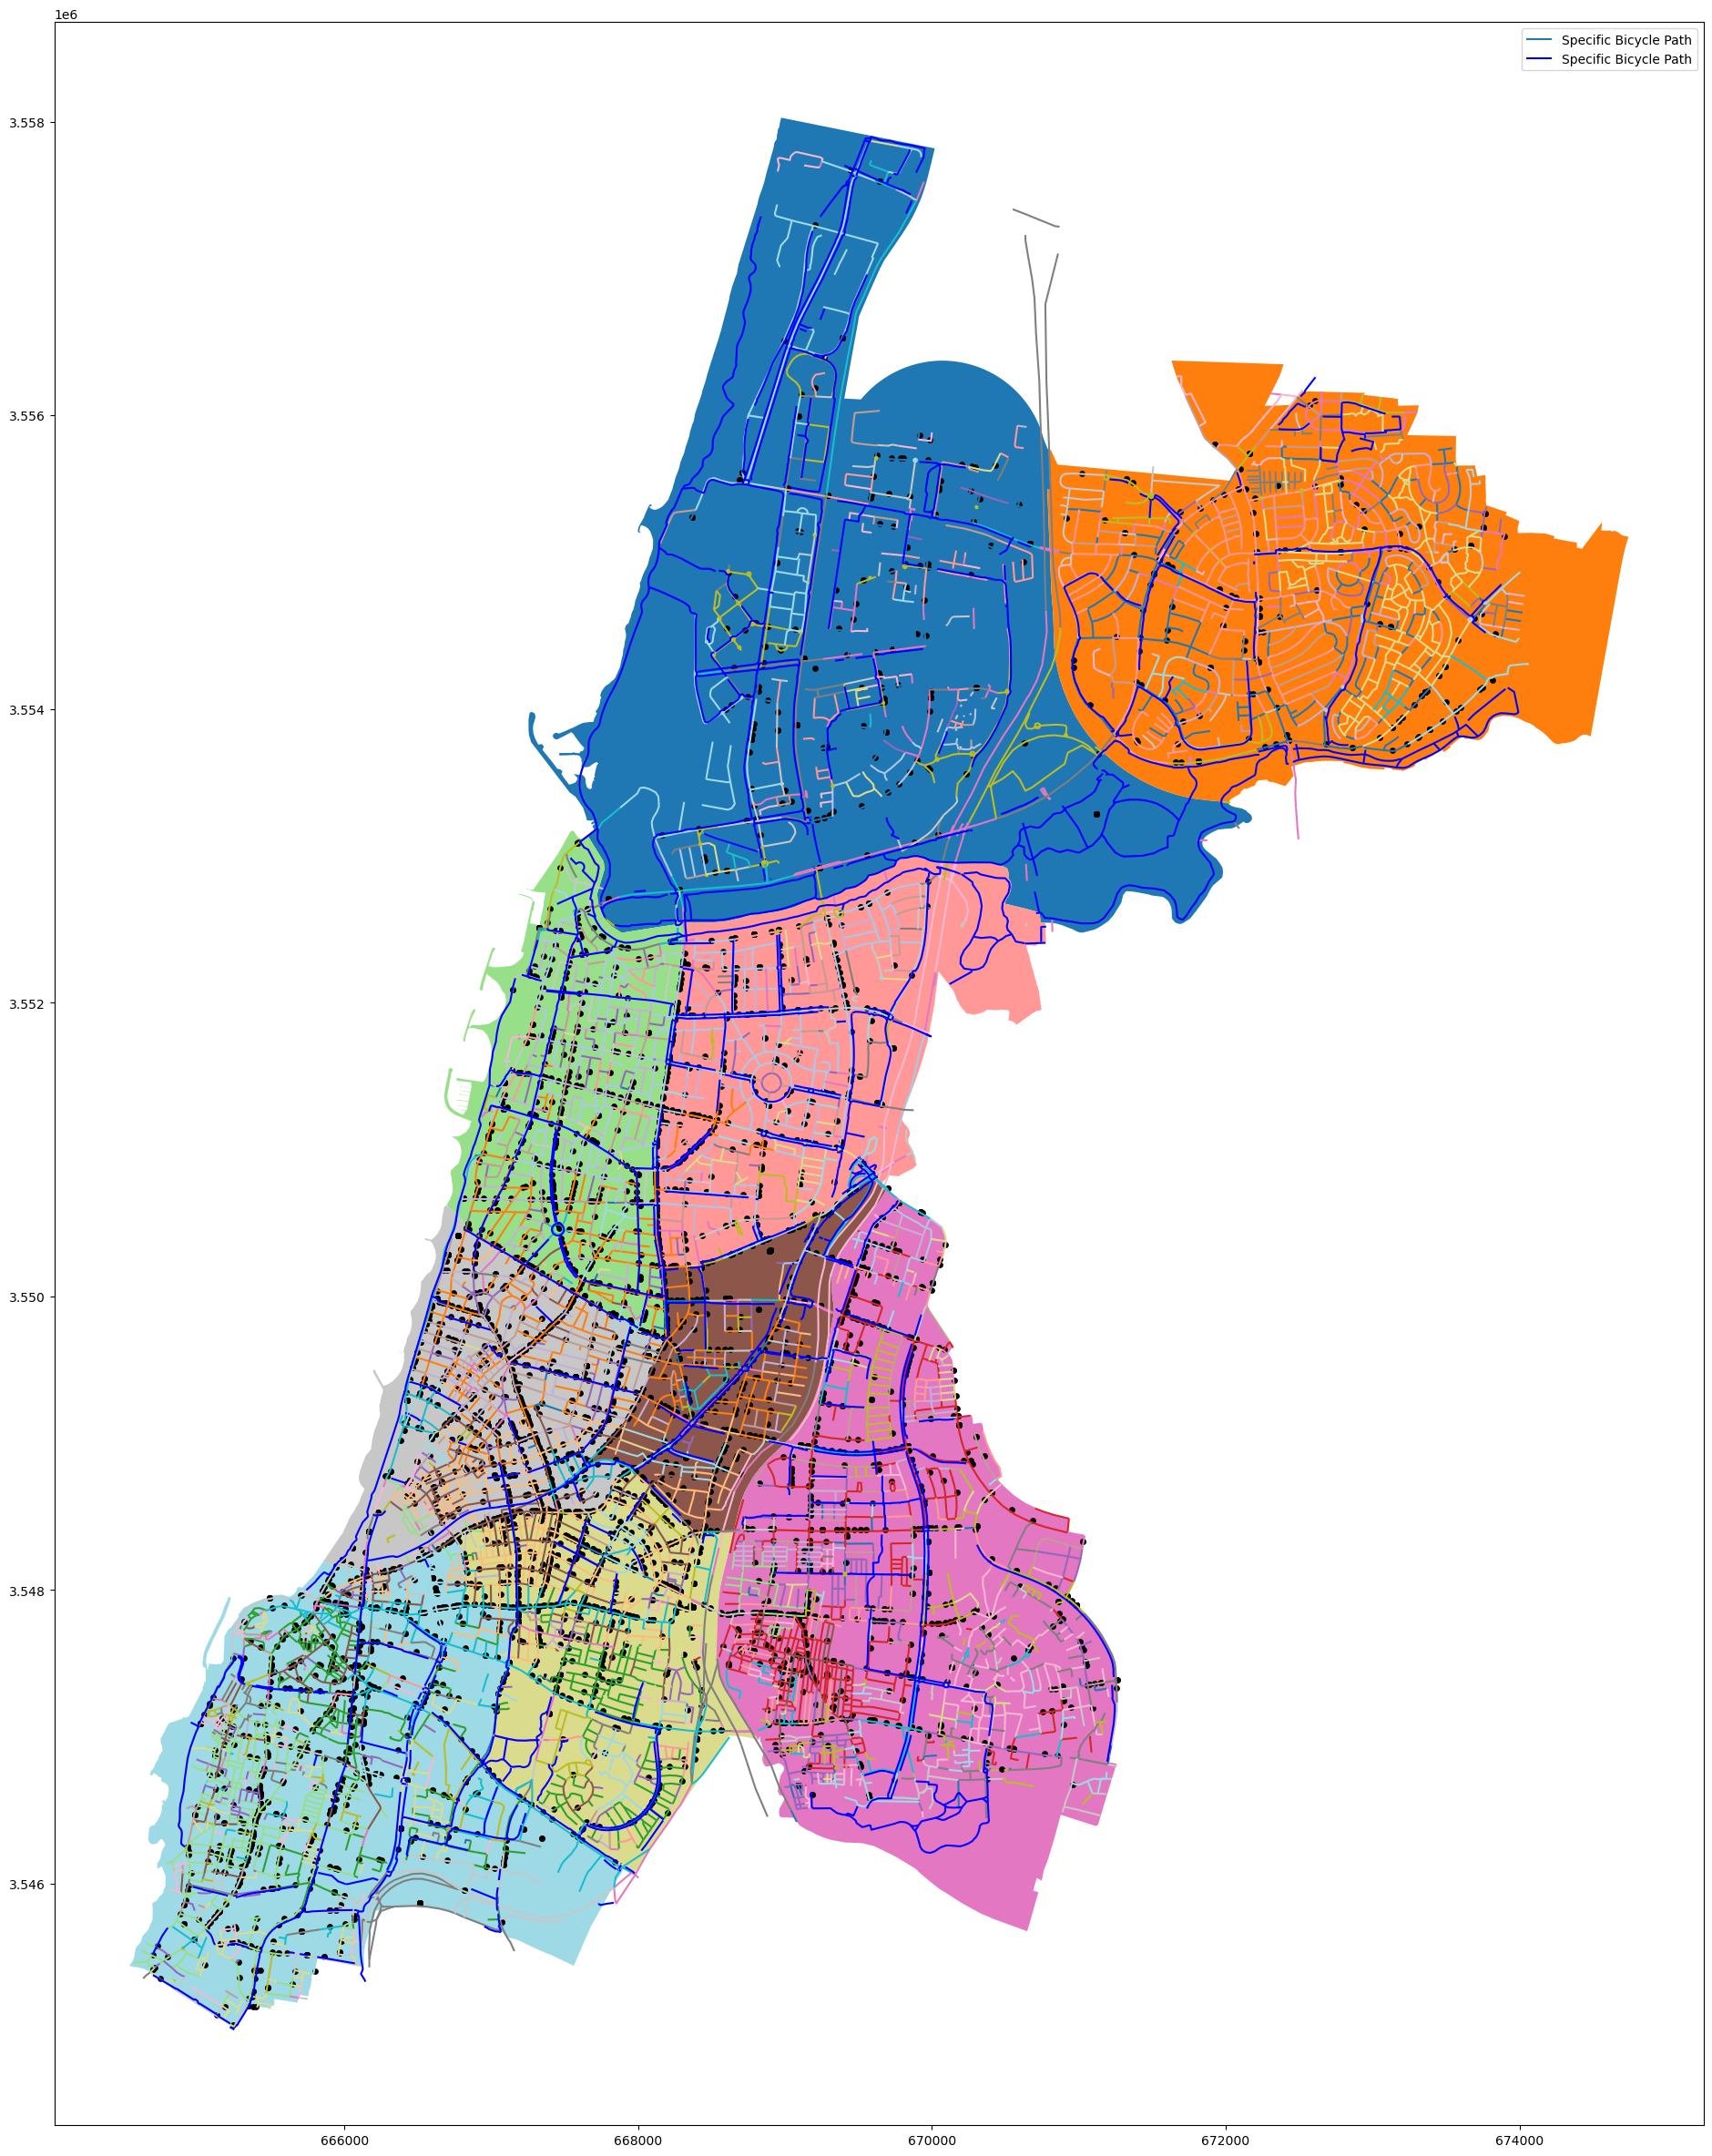

In [61]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_q.plot(ax=ax, cmap='tab20', legend=True,)
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='black', marker='o', markersize=15 )


plt.legend()
plt.show()

Length checks out OK

## Feature Engineering 

**BP and Accidents**<br>

    Adding cumulative BP and Cumulative accidents for each quarter

for each quarter:
* Get the area of each quarter
* get the length of all the BP in the quarter
* get the length of all the streets in the quarter

**Streets** 

    Adding total streets length for each quarter 
Side Note: I would do for each street but
* there is little data 
* data regarding which street is open is missing 
I don't think plotting this will be beneficial

Pearson Correlation between length of BP and number of accidents for each quarter

In [62]:
bp_ta_bp_and_meta

oid_shvil  msorech           dateimport  create_year  \
0            1    95.10  14/08/2024 02:30:05         2012   
1            2   201.14  14/08/2024 02:30:05         2013   
2            3   696.31  14/08/2024 02:30:05         2004   
3            4   659.20  14/08/2024 02:30:05         2018   
4            5   362.67  14/08/2024 02:30:05         2018   
..         ...      ...                  ...          ...   
866        462   197.41  14/08/2024 02:30:05         2014   
867        463  2112.94  14/08/2024 02:30:05           -1   
868        464    44.95  14/08/2024 02:30:05           -1   
869        465   112.12  14/08/2024 02:30:05           -1   
870        466    71.58  14/08/2024 02:30:05           -1   

                                     shemmikta create_date  \
0                         נמיר מיוניצ'מן דרומה        None   
1                   פרופס מנמיר עד קדושי השואה        None   
2     יאיר רוזנבלום מאורי צבי גרינברג עד פרופס        None   
3                     קק"ל מנמיר עד חיים לבנון        None   
4    רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר        None   
..                                         ...         ...   
866                שביל המוביל למרכז יצחק רבין        None   
867                                       None        None   
868                                       None        None   
869                                       None        None   
870                                       None        None   

                                              geometry  width direction  \
0    LINESTRING (669823.985 3557373.860, 669855.549...    2.5   דו סטרי   
1    LINESTRING (669232.834 3555478.027, 669169.381...    2.5   דו סטרי   
2    LINESTRING (669232.637 3555478.023, 669249.025...    2.1   דו סטרי   
3    LINESTRING (669354.261 3555417.055, 669410.178...    2.5   דו סטרי   
4    LINESTRING (669946.350 3555344.516, 669962.261...    2.0   דו סטרי   
..                                                 ...    ...       ...   
866  LINESTRING (669777.502 3553114.882, 669733.916...    NaN      None   
867  LINESTRING (670193.904 3552876.389, 670151.903...    NaN      None   
868  LINESTRING (669398.890 3552674.103, 669398.284...    NaN      None   
869  LINESTRING (668324.626 3551551.690, 668319.918...    NaN      None   
870  LINESTRING (668433.941 3550240.154, 668441.188...    NaN      None   

     bitzua miflas date_created  
0      2012   None         None  
1      2013   None         None  
2      2004   None         None  
3      2018  מדרכה         None  
4      2018   None   30/06/2018  
..      ...    ...          ...  
866    2014   None         None  
867      -1   None         None  
868      -1   None         None  
869      -1   None         None  
870      -1   None         None  

[871 rows x 12 columns]

### BP Feature Engineering 

#### Creating Cumulative BP with Accidents and Quarter

In [63]:
bp_ta_bp_and_meta['bp_length'] = bp_ta_bp_and_meta.geometry.length

In [64]:
# get all the bp in a quarter
bp_in_q = gpd.sjoin(bp_ta_bp_and_meta[['oid_shvil','shemmikta','bp_length','geometry','bitzua']], ta_q[['krova', 'geometry']], how='inner', predicate='intersects')

# We have more rows then original bp_ta_bp_and_meta since we have duplication and since
# since there are 47 duplicates(a bit ore then 5%) and most of them are on the same q, we can drop them
bp_in_q = bp_in_q.drop_duplicates(subset=['bp_length'])
bp_in_q

oid_shvil                                  shemmikta    bp_length  \
0            1                       נמיר מיוניצ'מן דרומה    95.089688   
1            2                 פרופס מנמיר עד קדושי השואה   201.128828   
2            3   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס   696.261026   
3            4                   קק"ל מנמיר עד חיים לבנון   659.153296   
4            5  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   362.644518   
..         ...                                        ...          ...   
866        462                שביל המוביל למרכז יצחק רבין   197.392781   
867        463                                       None  2112.772412   
868        464                                       None    44.950912   
869        465                                       None   112.108111   
870        466                                       None    71.575372   

                                              geometry  bitzua  index_right  \
0    LINESTRING (669823.985 3557373.860, 669855.549...    2012            0   
1    LINESTRING (669232.834 3555478.027, 669169.381...    2013            0   
2    LINESTRING (669232.637 3555478.023, 669249.025...    2004            0   
3    LINESTRING (669354.261 3555417.055, 669410.178...    2018            0   
4    LINESTRING (669946.350 3555344.516, 669962.261...    2018            0   
..                                                 ...     ...          ...   
866  LINESTRING (669777.502 3553114.882, 669733.916...    2014            0   
867  LINESTRING (670193.904 3552876.389, 670151.903...      -1            3   
868  LINESTRING (669398.890 3552674.103, 669398.284...      -1            3   
869  LINESTRING (668324.626 3551551.690, 668319.918...      -1            3   
870  LINESTRING (668433.941 3550240.154, 668441.188...      -1            4   

     krova  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
866      1  
867      4  
868      4  
869      4  
870      6  

[869 rows x 7 columns]

Making sure that BP that have no year of creation (bitzua) are unique and not actually related to other BP<br>
If they are unique, drop them.

In [65]:
bp_in_q[bp_in_q.oid_shvil.isin(bp_in_q[bp_in_q.bitzua == -1].oid_shvil)]

oid_shvil                       shemmikta    bp_length  \
818        419                            None     7.148114   
819        420                            None   235.178823   
820        421                            None   110.085315   
821        422                            None   135.646550   
825        426       אינשטיין מלישנסקי עד הגשר   319.429381   
828        429                            None    74.291330   
829        430                            None    28.706871   
830        431                            None     5.463124   
831        432                            None    19.641170   
832        433                            None    29.649964   
833        434                            None     7.408510   
835        436                            None    17.048499   
836        437                           שניצר   435.287728   
837        438                            None    55.722874   
838        439                     קדושי השואה   554.091195   
839        440                            None     9.411587   
840        441                            None     7.802132   
841        442                            None     6.917799   
842        443                            None     7.652299   
849        449                            None    24.925195   
851        451                            None   237.200398   
858        456  הגדוד העברי מצ'לנוב עד הר ציון   172.749519   
862        458                            None   157.466420   
864        460           חנה רובינא גדה דרומית   235.462831   
867        463                            None  2112.772412   
868        464                            None    44.950912   
869        465                            None   112.108111   
870        466                            None    71.575372   

                                              geometry  bitzua  index_right  \
818  LINESTRING (668405.407 3554224.806, 668398.271...      -1            0   
819  LINESTRING (668328.569 3552403.104, 668215.470...      -1            2   
820  LINESTRING (669671.803 3553011.534, 669678.363...      -1            3   
821  LINESTRING (670743.348 3552413.244, 670743.408...      -1            3   
825  LINESTRING (668722.847 3554258.059, 668645.585...      -1            0   
828  LINESTRING (669114.211 3553307.829, 669119.029...      -1            0   
829  LINESTRING (669139.697 3553260.352, 669168.290...      -1            0   
830  LINESTRING (669177.650 3553267.796, 669173.921...      -1            0   
831  LINESTRING (669171.699 3553253.385, 669172.367...      -1            0   
832  LINESTRING (669174.747 3553223.387, 669162.198...      -1            0   
833  LINESTRING (669138.878 3553222.759, 669133.694...      -1            0   
835  LINESTRING (668727.210 3555599.430, 668722.695...      -1            0   
836  LINESTRING (669177.008 3556117.864, 669172.205...      -1            0   
837  LINESTRING (669137.693 3555857.832, 669096.634...      -1            0   
838  LINESTRING (669077.515 3556061.715, 669071.257...      -1            0   
839  LINESTRING (669006.054 3556456.529, 669014.758...      -1            0   
840  LINESTRING (669026.431 3556449.754, 669034.124...      -1            0   
841  LINESTRING (669018.101 3556491.192, 669024.660...      -1            0   
842  LINESTRING (669037.420 3556484.549, 669044.631...      -1            0   
849  LINESTRING (667330.906 3551499.313, 667306.793...      -1            2   
851  LINESTRING (667372.545 3552078.483, 667454.736...      -1            2   
858  LINESTRING (667661.811 3548450.710, 667698.700...      -1            7   
862  LINESTRING (668569.064 3553991.289, 668557.508...      -1            0   
864  LINESTRING (671517.200 3555437.604, 671521.514...      -1            1   
867  LINESTRING (670193.904 3552876.389, 670151.903...      -1            3   
868  LINESTRING (669398.890 3552674.103, 669398.284...      -1            3   
869  LINESTRING (668324.626 3551551.690, 668

In [66]:
# Making sure that not just oid is unique also name of bp
bp_in_q[bp_in_q.shemmikta.isin(bp_in_q[bp_in_q.bitzua == -1].dropna().shemmikta)]

oid_shvil                       shemmikta   bp_length  \
825        426       אינשטיין מלישנסקי עד הגשר  319.429381   
836        437                           שניצר  435.287728   
838        439                     קדושי השואה  554.091195   
858        456  הגדוד העברי מצ'לנוב עד הר ציון  172.749519   
864        460           חנה רובינא גדה דרומית  235.462831   

                                              geometry  bitzua  index_right  \
825  LINESTRING (668722.847 3554258.059, 668645.585...      -1            0   
836  LINESTRING (669177.008 3556117.864, 669172.205...      -1            0   
838  LINESTRING (669077.515 3556061.715, 669071.257...      -1            0   
858  LINESTRING (667661.811 3548450.710, 667698.700...      -1            7   
864  LINESTRING (671517.200 3555437.604, 671521.514...      -1            1   

     krova  
825      1  
836      1  
838      1  
858      8  
864      2

Bitzua with -1 is unique so I drop them all.

In [67]:
bp_in_q_bitzua_no_na = bp_in_q[~bp_in_q.oid_shvil.isin(bp_in_q[bp_in_q.bitzua == -1].oid_shvil)].copy()
bp_in_q_bitzua_no_na

oid_shvil                                  shemmikta   bp_length  \
0            1                       נמיר מיוניצ'מן דרומה   95.089688   
1            2                 פרופס מנמיר עד קדושי השואה  201.128828   
2            3   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס  696.261026   
3            4                   קק"ל מנמיר עד חיים לבנון  659.153296   
4            5  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר  362.644518   
..         ...                                        ...         ...   
860        457        יובל נאמן מלוי אשכול עד אייזיק שטרן   19.522751   
861        457        יובל נאמן מלוי אשכול עד אייזיק שטרן  135.518261   
863        459      יהודה עמיחי מיובל נאמן עד אייזיק שטרן  146.910140   
865        461                     פארק גני יהושוע (רוקח)  325.943424   
866        462                שביל המוביל למרכז יצחק רבין  197.392781   

                                              geometry  bitzua  index_right  \
0    LINESTRING (669823.985 3557373.860, 669855.549...    2012            0   
1    LINESTRING (669232.834 3555478.027, 669169.381...    2013            0   
2    LINESTRING (669232.637 3555478.023, 669249.025...    2004            0   
3    LINESTRING (669354.261 3555417.055, 669410.178...    2018            0   
4    LINESTRING (669946.350 3555344.516, 669962.261...    2018            0   
..                                                 ...     ...          ...   
860  LINESTRING (668688.687 3554091.847, 668685.107...    2024            0   
861  LINESTRING (668612.378 3554202.585, 668617.080...    2024            0   
863  LINESTRING (668685.107 3554072.655, 668682.157...    2024            0   
865  LINESTRING (670629.535 3553186.344, 670669.513...    2024            0   
866  LINESTRING (669777.502 3553114.882, 669733.916...    2014            0   

     krova  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
860      1  
861      1  
863      1  
865      1  
866      1  

[841 rows x 7 columns]

In [68]:
# Define the range for krova and bitzua
krova_range = range(1, 10)  # 1 to 9 inclusive
bitzua_range = range(2000, 2025)  # 2014 to 2023 inclusive

# Create a MultiIndex
index = pd.MultiIndex.from_product([krova_range, bitzua_range], names=['krova', 'bitzua'])

# Create a DataFrame with the MultiIndex
# Initialize with random data or zeros
bp_krova = pd.DataFrame( index=index)
bp_krova['bp_length'] = 0
# Display the DataFrame
bp_krova

bp_length
krova bitzua           
1     2000            0
      2001            0
      2002            0
      2003            0
      2004            0
...                 ...
9     2020            0
      2021            0
      2022            0
      2023            0
      2024            0

[225 rows x 1 columns]

In [69]:
# Ensure the DataFrame is sorted by 'krova' and 'year'
bp_in_q_bitzua_no_na_sort = bp_in_q_bitzua_no_na.sort_values(by=['krova', 'bitzua'])

# Calculate the cumulative sum
bp_krova['bp_length'] = bp_in_q_bitzua_no_na_sort.groupby(['krova', 'bitzua'])['bp_length'].sum()

bp_krova

bp_length
krova bitzua             
1     2000    1431.567191
      2001            NaN
      2002            NaN
      2003            NaN
      2004    4713.852363
...                   ...
9     2020    2081.540059
      2021    1509.641511
      2022     537.031651
      2023     171.426575
      2024            NaN

[225 rows x 1 columns]

In [70]:
bp_krova['cum_bp_length'] = bp_krova.groupby('krova')['bp_length'].cumsum()
bp_krova

bp_length  cum_bp_length
krova bitzua                            
1     2000    1431.567191    1431.567191
      2001            NaN            NaN
      2002            NaN            NaN
      2003            NaN            NaN
      2004    4713.852363    6145.419554
...                   ...            ...
9     2020    2081.540059   20832.869564
      2021    1509.641511   22342.511075
      2022     537.031651   22879.542727
      2023     171.426575   23050.969302
      2024            NaN            NaN

[225 rows x 2 columns]

In [71]:
# Forward fill NaN values with the previous non-NaN value for both columns
bp_krova['bp_length'] = bp_krova['bp_length'].ffill()
bp_krova['cum_bp_length'] = bp_krova['cum_bp_length'].ffill()

# Display the updated DataFrame
bp_krova


bp_length  cum_bp_length
krova bitzua                            
1     2000    1431.567191    1431.567191
      2001    1431.567191    1431.567191
      2002    1431.567191    1431.567191
      2003    1431.567191    1431.567191
      2004    4713.852363    6145.419554
...                   ...            ...
9     2020    2081.540059   20832.869564
      2021    1509.641511   22342.511075
      2022     537.031651   22879.542727
      2023     171.426575   23050.969302
      2024     171.426575   23050.969302

[225 rows x 2 columns]

In [72]:
bp_krova.xs(4, level='krova')

bp_length  cum_bp_length
bitzua                            
2000    3652.646051    3652.646051
2001    3652.646051    3652.646051
2002     904.620455    4557.266506
2003     904.620455    4557.266506
2004    5954.678368   10511.944875
2005    5954.678368   10511.944875
2006    5954.678368   10511.944875
2007    5954.678368   10511.944875
2008    5954.678368   10511.944875
2009    5954.678368   10511.944875
2010    5954.678368   10511.944875
2011    5954.678368   10511.944875
2012    1045.363666   11557.308541
2013     502.869287   12060.177828
2014     308.988817   12369.166646
2015     308.988817   12369.166646
2016    1701.036386   14070.203032
2017     303.627379   14373.830411
2018    1196.270724   15570.101135
2019     451.048317   16021.149452
2020    1264.659531   17285.808984
2021    4489.535020   21775.344004
2022    3023.563053   24798.907057
2023    3023.563053   24798.907057
2024    3023.563053   24798.907057

So we have
* bp length in each q over the years
* bp length cumulative in each q over the years
* q area


We also want number of accidents for each q over the years.<br>
For that I need:
* get the years of accidents in each q
* get the years of accidents for mm in in each q
* get the number of accidents in each q over the years
* get the number of mm accident in each q over the years

Then filter the bp_krova with the years.


Making sure we are not missing something in regards of years

In [73]:
# Spatial join of TA accidents and Quarters
i_m_h_ta_quarters_gdf = gpd.sjoin(i_m_h_ta_gdf, ta_q[['krova', 'geometry']], how='inner', predicate='intersects')
i_m_h_ta_no_mm_quarters_gdf = gpd.sjoin(i_m_h_ta_no_mm_gdf, ta_q[['krova', 'geometry']], how='inner', predicate='intersects')
i_m_h_ta_mm_quarters_gdf = gpd.sjoin(i_m_h_ta_mm_gdf, ta_q[['krova', 'geometry']], how='inner', predicate='intersects')

In [74]:
# 
i_m_h_ta_q_gb_krova = pd.DataFrame(i_m_h_ta_quarters_gdf.groupby(['krova', 'accident_year']).size(), columns=['all_accident_cnt'])
i_m_h_ta_no_mm_q_gb_krova = pd.DataFrame(i_m_h_ta_no_mm_quarters_gdf.groupby(['krova', 'accident_year']).size(),columns=['no_mm_accident_cnt'])
i_m_h_ta_mm_q_gb_krova = pd.DataFrame(i_m_h_ta_mm_quarters_gdf.groupby(['krova', 'accident_year']).size(),columns=['mm_accident_cnt'])
i_m_h_ta_q_gb_krova

all_accident_cnt
krova accident_year                  
1     2013                       1399
      2014                       1109
      2015                       1289
      2016                       1159
      2017                       1108
...                               ...
9     2020                       1094
      2021                       1157
      2022                       1187
      2023                       1088
      2024                        422

[108 rows x 1 columns]

In [75]:
# trying to assign the accident_cnt to bp_krova
bp_krova['all_acc_cnt'] = 0
bp_krova['no_mm_acc_cnt'] = 0
bp_krova['mm_acc_cnt'] = 0

bp_krova['all_acc_cnt']   = i_m_h_ta_q_gb_krova['all_accident_cnt']
bp_krova['no_mm_acc_cnt'] = i_m_h_ta_no_mm_q_gb_krova['no_mm_accident_cnt']
bp_krova['mm_acc_cnt']    = i_m_h_ta_mm_q_gb_krova['mm_accident_cnt']
bp_krova

bp_length  cum_bp_length  all_acc_cnt  no_mm_acc_cnt  \
krova bitzua                                                           
1     2000    1431.567191    1431.567191          NaN            NaN   
      2001    1431.567191    1431.567191          NaN            NaN   
      2002    1431.567191    1431.567191          NaN            NaN   
      2003    1431.567191    1431.567191          NaN            NaN   
      2004    4713.852363    6145.419554          NaN            NaN   
...                   ...            ...          ...            ...   
9     2020    2081.540059   20832.869564       1094.0          990.0   
      2021    1509.641511   22342.511075       1157.0         1042.0   
      2022     537.031651   22879.542727       1187.0         1067.0   
      2023     171.426575   23050.969302       1088.0          981.0   
      2024     171.426575   23050.969302        422.0          383.0   

              mm_acc_cnt  
krova bitzua              
1     2000           NaN  
      2001           NaN  
      2002           NaN  
      2003           NaN  
      2004           NaN  
...                  ...  
9     2020         104.0  
      2021         115.0  
      2022         120.0  
      2023         107.0  
      2024          39.0  

[225 rows x 5 columns]

In [76]:
bp_krova.xs(3, level='krova')

bp_length  cum_bp_length  all_acc_cnt  no_mm_acc_cnt  mm_acc_cnt
bitzua                                                                    
2000    2393.581055    2393.581055          NaN            NaN         NaN
2001    2393.581055    2393.581055          NaN            NaN         NaN
2002     914.986474    3308.567529          NaN            NaN         NaN
2003     914.986474    3308.567529          NaN            NaN         NaN
2004    2527.949327    5836.516856          NaN            NaN         NaN
2005    2527.949327    5836.516856          NaN            NaN         NaN
2006    2527.949327    5836.516856          NaN            NaN         NaN
2007    2527.949327    5836.516856          NaN            NaN         NaN
2008    2527.949327    5836.516856          NaN            NaN         NaN
2009    2527.949327    5836.516856          NaN            NaN         NaN
2010    2527.949327    5836.516856          NaN            NaN         NaN
2011    2527.949327    5836.516856          NaN            NaN         NaN
2012    2608.205283    8444.722139          NaN            NaN         NaN
2013    2608.205283    8444.722139       1153.0         1112.0        41.0
2014    2608.205283    8444.722139       1050.0          971.0        79.0
2015    2608.205283    8444.722139       1009.0          956.0        53.0
2016    2608.205283    8444.722139       1077.0          986.0        91.0
2017    2608.205283    8444.722139        944.0          856.0        88.0
2018     257.426020    8702.148159        864.0          780.0        84.0
2019     257.426020    8702.148159        726.0          631.0        95.0
2020    1176.904473    9879.052632        636.0          552.0        84.0
2021    4378.072371   14257.125003        654.0          550.0       104.0
2022    1171.167498   15428.292501        600.0          521.0        79.0
2023    1171.167498   15428.292501        506.0          441.0        65.0
2024    1171.167498   15428.292501        211.0          180.0        31.0

In [77]:
# Filter the DataFrame to keep only rows where bitzua is 2013 or greater
bp_krova_filtered = bp_krova.loc[bp_krova.index.get_level_values('bitzua') >= 2013].copy()

# Display the filtered DataFrame
bp_krova_filtered
bp_krova_filtered.xs(3, level='krova')

bp_length  cum_bp_length  all_acc_cnt  no_mm_acc_cnt  mm_acc_cnt
bitzua                                                                    
2013    2608.205283    8444.722139       1153.0         1112.0        41.0
2014    2608.205283    8444.722139       1050.0          971.0        79.0
2015    2608.205283    8444.722139       1009.0          956.0        53.0
2016    2608.205283    8444.722139       1077.0          986.0        91.0
2017    2608.205283    8444.722139        944.0          856.0        88.0
2018     257.426020    8702.148159        864.0          780.0        84.0
2019     257.426020    8702.148159        726.0          631.0        95.0
2020    1176.904473    9879.052632        636.0          552.0        84.0
2021    4378.072371   14257.125003        654.0          550.0       104.0
2022    1171.167498   15428.292501        600.0          521.0        79.0
2023    1171.167498   15428.292501        506.0          441.0        65.0
2024    1171.167498   15428.292501        211.0          180.0        31.0

In [78]:
# Calculating Cum Sum
bp_krova_filtered['cum_all_acc_cnt'] = bp_krova_filtered.groupby('krova')['all_acc_cnt'].cumsum()
bp_krova_filtered['cum_no_mm_acc_cnt'] = bp_krova_filtered.groupby('krova')['no_mm_acc_cnt'].cumsum()
bp_krova_filtered['cum_mm_acc_cnt'] = bp_krova_filtered.groupby('krova')['mm_acc_cnt'].cumsum()


bp_krova_filtered

bp_length  cum_bp_length  all_acc_cnt  no_mm_acc_cnt  \
krova bitzua                                                           
1     2013    4613.175246   15716.611624       1399.0         1360.0   
      2014     758.026089   16474.637713       1109.0         1074.0   
      2015    2335.205547   18809.843260       1289.0         1244.0   
      2016     498.878369   19308.721628       1159.0         1114.0   
      2017    4680.392487   23989.114115       1108.0         1048.0   
...                   ...            ...          ...            ...   
9     2020    2081.540059   20832.869564       1094.0          990.0   
      2021    1509.641511   22342.511075       1157.0         1042.0   
      2022     537.031651   22879.542727       1187.0         1067.0   
      2023     171.426575   23050.969302       1088.0          981.0   
      2024     171.426575   23050.969302        422.0          383.0   

              mm_acc_cnt  cum_all_acc_cnt  cum_no_mm_acc_cnt  cum_mm_acc_cnt  
krova bitzua                                                                  
1     2013          39.0           1399.0             1360.0            39.0  
      2014          35.0           2508.0             2434.0            74.0  
      2015          45.0           3797.0             3678.0           119.0  
      2016          45.0           4956.0             4792.0           164.0  
      2017          60.0           6064.0             5840.0           224.0  
...                  ...              ...                ...             ...  
9     2020         104.0          12306.0            11451.0           855.0  
      2021         115.0          13463.0            12493.0           970.0  
      2022         120.0          14650.0            13560.0          1090.0  
      2023         107.0          15738.0            14541.0          1197.0  
      2024          39.0          16160.0            14924.0          1236.0  

[108 rows x 8 columns]

In [79]:
# Calculating Ratio
bp_krova_filtered['r_all_acc_bp_len'] = bp_krova_filtered['cum_all_acc_cnt'] / bp_krova_filtered['cum_bp_length']
bp_krova_filtered['r_no_mm_acc_bp_len'] = bp_krova_filtered['cum_no_mm_acc_cnt'] / bp_krova_filtered['cum_bp_length']
bp_krova_filtered['r_mm_acc_bp_len'] = bp_krova_filtered['cum_mm_acc_cnt'] / bp_krova_filtered['cum_bp_length']

bp_krova_filtered

bp_length  cum_bp_length  all_acc_cnt  no_mm_acc_cnt  \
krova bitzua                                                           
1     2013    4613.175246   15716.611624       1399.0         1360.0   
      2014     758.026089   16474.637713       1109.0         1074.0   
      2015    2335.205547   18809.843260       1289.0         1244.0   
      2016     498.878369   19308.721628       1159.0         1114.0   
      2017    4680.392487   23989.114115       1108.0         1048.0   
...                   ...            ...          ...            ...   
9     2020    2081.540059   20832.869564       1094.0          990.0   
      2021    1509.641511   22342.511075       1157.0         1042.0   
      2022     537.031651   22879.542727       1187.0         1067.0   
      2023     171.426575   23050.969302       1088.0          981.0   
      2024     171.426575   23050.969302        422.0          383.0   

              mm_acc_cnt  cum_all_acc_cnt  cum_no_mm_acc_cnt  cum_mm_acc_cnt  \
krova bitzua                                                                   
1     2013          39.0           1399.0             1360.0            39.0   
      2014          35.0           2508.0             2434.0            74.0   
      2015          45.0           3797.0             3678.0           119.0   
      2016          45.0           4956.0             4792.0           164.0   
      2017          60.0           6064.0             5840.0           224.0   
...                  ...              ...                ...             ...   
9     2020         104.0          12306.0            11451.0           855.0   
      2021         115.0          13463.0            12493.0           970.0   
      2022         120.0          14650.0            13560.0          1090.0   
      2023         107.0          15738.0            14541.0          1197.0   
      2024          39.0          16160.0            14924.0          1236.0   

              r_all_acc_bp_len  r_no_mm_acc_bp_len  r_mm_acc_bp_len  
krova bitzua                                                         
1     2013            0.089014            0.086533         0.002481  
      2014            0.152234            0.147742         0.004492  
      2015            0.201862            0.195536         0.006326  
      2016            0.256672            0.248178         0.008494  
      2017            0.252781            0.243444         0.009338  
...                        ...                 ...              ...  
9     2020            0.590701            0.549660         0.041041  
      2021            0.602573            0.559158         0.043415  
      2022            0.640310            0.592669         0.047641  
      2023            0.682748            0.630819         0.051928  
      2024            0.701055            0.647435         0.053620  

[108 rows x 11 columns]

### Quarters Feature Engineering

#### Polygone Area

In [80]:
# area of each quarter
ta_q['area'] = ta_q.geometry.area
ta_q

oidrova  krova           dateimport     ShapeArea  \
0        1      1  01/12/2015 02:28:14  1.301654e+07   
1        2      2  01/12/2015 02:28:14  8.013404e+06   
2        3      3  01/12/2015 02:28:14  3.380430e+06   
3        4      4  01/12/2015 02:28:14  4.510255e+06   
4        5      6  01/12/2015 02:28:14  2.089044e+06   
5        6      9  01/12/2015 02:28:14  7.879856e+06   
6        7      5  01/12/2015 02:28:14  3.024297e+06   
7        8      8  01/12/2015 02:28:14  3.420996e+06   
8        9      7  01/12/2015 02:28:14  6.343551e+06   

                                            geometry  index          area  
0  POLYGON ((670795.655 3555762.452, 670797.577 3...      0  1.301456e+07  
1  POLYGON ((672021.029 3553364.492, 672014.690 3...      1  8.012438e+06  
2  POLYGON ((668311.070 3552547.701, 668311.229 3...      2  3.379848e+06  
3  POLYGON ((670771.828 3552544.564, 670771.584 3...      3  4.509556e+06  
4  POLYGON ((668160.048 3550196.192, 668162.425 3...      4  2.088708e+06  
5  POLYGON ((668811.121 3546980.368, 668808.698 3...      5  7.878684e+06  
6  POLYGON ((666698.783 3550619.396, 666701.339 3...      6  3.023758e+06  
7  POLYGON ((667954.133 3548820.374, 667956.725 3...      7  3.420414e+06  
8  POLYGON ((665854.540 3548193.053, 665868.137 3...      8  6.342357e+06

### Streets Feature Engineering

#### Getting Streets Length and Cumulative Length

In [81]:
ta_streets['street_length'] = ta_streets.geometry.length
ta_streets

oidrechov  krechov      trechov         shemangli  mslamas  tsug  \
0           1.0    915.0  הרוגי מלכות   HARUGEY MALKHOT    336.0  רחוב   
1           2.0      0.0            0            UKNOWN      0.0  רחוב   
2           3.0    265.0      אמסטרדם         AMSTERDAM    516.0  רחוב   
3           4.0    644.0    אלון יגאל      YIG'AL ALLON   2524.0  רחוב   
4           5.0    634.0      מרגולין          MARGOLIN   2649.0  רחוב   
...         ...      ...          ...               ...      ...   ...   
8874     9851.0   3007.0   שבטי ישראל  SHIVTEY YISRA'EL   1983.0  רחוב   
8875     9852.0   3058.0  אבינרי יצחק           AVINERY   2027.0  רחוב   
8876     9853.0   3058.0  אבינרי יצחק           AVINERY   2027.0  רחוב   
8877     9855.0   3907.0         3907              None   1703.0  רחוב   
8878     9857.0     34.0        מטלון           MATALON   2327.0  רחוב   

      kkivun   UniqueId       shemarvit  kreka  \
0        0.0  507-10001       قتل مملكة  100.0   
1        3.0  507-10002            None  100.0   
2        1.0  507-10003        أمستردام  100.0   
3        0.0  507-10004      ألون ييغال  200.0   
4        1.0  507-10005        مارغولين  100.0   
...      ...        ...             ...    ...   
8874     0.0  507-17843   قبائل إسرائيل  100.0   
8875     0.0  507-20562  Avinri Yitzhak  100.0   
8876     0.0  507-20563  Avinri Yitzhak  100.0   
8877     0.0  507-21960            3907  100.0   
8878     0.0  507-21966         ميتالون  100.0   

                                               geometry  street_length  
0     LINESTRING (672865.880 3554095.253, 672895.216...      32.805562  
1     LINESTRING (666990.498 3551436.940, 667065.337...      75.559350  
2     LINESTRING (667879.712 3551424.162, 667940.741...      63.283401  
3     LINESTRING (669570.036 3550420.535, 669581.404...      25.979540  
4     LINESTRING (669329.153 3548322.758, 669409.403...      80.262574  
...                                                 ...            ...  
8874  LINESTRING (665771.816 3547023.159, 665760.256...      29.466544  
8875  LINESTRING (665585.719 3547178.152, 665627.936...     164.959426  
8876  LINESTRING (665700.142 3547064.296, 665759.119...      82.717053  
8877  LINESTRING (665087.059 3546677.092, 665075.120...      31.021221  
8878  LINESTRING (666917.433 3548291.622, 666930.486...      43.847359  

[8879 rows x 12 columns]

In [82]:
ta_streets.length.value_counts()

32.805562     1
20.102087     1
63.825799     1
31.448977     1
46.092444     1
             ..
90.687522     1
102.406872    1
107.858034    1
120.822715    1
43.847359     1
Name: count, Length: 8879, dtype: int64

Since each length is unique we will use it to drop any duplicates

Getting streets in each Quarter

In [83]:
streets_in_q = gpd.sjoin(ta_streets[['oidrechov','trechov','shemangli','kkivun', 'geometry','street_length']], ta_q[['krova', 'geometry']], how='inner', predicate='intersects')
streets_in_q

oidrechov      trechov         shemangli  kkivun  \
0           1.0  הרוגי מלכות   HARUGEY MALKHOT     0.0   
1           2.0            0            UKNOWN     3.0   
2           3.0      אמסטרדם         AMSTERDAM     1.0   
3           4.0    אלון יגאל      YIG'AL ALLON     0.0   
4           5.0      מרגולין          MARGOLIN     1.0   
...         ...          ...               ...     ...   
8874     9851.0   שבטי ישראל  SHIVTEY YISRA'EL     0.0   
8875     9852.0  אבינרי יצחק           AVINERY     0.0   
8876     9853.0  אבינרי יצחק           AVINERY     0.0   
8877     9855.0         3907              None     0.0   
8878     9857.0        מטלון           MATALON     0.0   

                                               geometry  street_length  \
0     LINESTRING (672865.880 3554095.253, 672895.216...      32.805562   
1     LINESTRING (666990.498 3551436.940, 667065.337...      75.559350   
2     LINESTRING (667879.712 3551424.162, 667940.741...      63.283401   
3     LINESTRING (669570.036 3550420.535, 669581.404...      25.979540   
4     LINESTRING (669329.153 3548322.758, 669409.403...      80.262574   
...                                                 ...            ...   
8874  LINESTRING (665771.816 3547023.159, 665760.256...      29.466544   
8875  LINESTRING (665585.719 3547178.152, 665627.936...     164.959426   
8876  LINESTRING (665700.142 3547064.296, 665759.119...      82.717053   
8877  LINESTRING (665087.059 3546677.092, 665075.120...      31.021221   
8878  LINESTRING (666917.433 3548291.622, 666930.486...      43.847359   

      index_right  krova  
0               1      2  
1               2      3  
2               2      3  
3               5      9  
4               5      9  
...           ...    ...  
8874            8      7  
8875            8      7  
8876            8      7  
8877            8      7  
8878            7      8  

[9100 rows x 8 columns]

In [84]:
# Dropping duplicates
streets_in_q = streets_in_q.drop_duplicates(subset=['street_length'])
streets_in_q

oidrechov      trechov         shemangli  kkivun  \
0           1.0  הרוגי מלכות   HARUGEY MALKHOT     0.0   
1           2.0            0            UKNOWN     3.0   
2           3.0      אמסטרדם         AMSTERDAM     1.0   
3           4.0    אלון יגאל      YIG'AL ALLON     0.0   
4           5.0      מרגולין          MARGOLIN     1.0   
...         ...          ...               ...     ...   
8874     9851.0   שבטי ישראל  SHIVTEY YISRA'EL     0.0   
8875     9852.0  אבינרי יצחק           AVINERY     0.0   
8876     9853.0  אבינרי יצחק           AVINERY     0.0   
8877     9855.0         3907              None     0.0   
8878     9857.0        מטלון           MATALON     0.0   

                                               geometry  street_length  \
0     LINESTRING (672865.880 3554095.253, 672895.216...      32.805562   
1     LINESTRING (666990.498 3551436.940, 667065.337...      75.559350   
2     LINESTRING (667879.712 3551424.162, 667940.741...      63.283401   
3     LINESTRING (669570.036 3550420.535, 669581.404...      25.979540   
4     LINESTRING (669329.153 3548322.758, 669409.403...      80.262574   
...                                                 ...            ...   
8874  LINESTRING (665771.816 3547023.159, 665760.256...      29.466544   
8875  LINESTRING (665585.719 3547178.152, 665627.936...     164.959426   
8876  LINESTRING (665700.142 3547064.296, 665759.119...      82.717053   
8877  LINESTRING (665087.059 3546677.092, 665075.120...      31.021221   
8878  LINESTRING (666917.433 3548291.622, 666930.486...      43.847359   

      index_right  krova  
0               1      2  
1               2      3  
2               2      3  
3               5      9  
4               5      9  
...           ...    ...  
8874            8      7  
8875            8      7  
8876            8      7  
8877            8      7  
8878            7      8  

[8860 rows x 8 columns]

Getting total street length in each Quarter

In [85]:
street_length_in_q = pd.DataFrame(streets_in_q.groupby('krova').street_length.sum())
street_length_in_q

street_length
krova               
1       98179.376498
2      110005.705942
3       64029.796480
4       58038.417663
5       67338.855129
6       34954.056247
7      119412.634977
8       76179.594682
9      133933.606790

## Exploration that should be done before diving deep into analyzing

---

### Quarter Comparison Analysis

#### 1. **Compare Quarter Area:**
   - **With Bike Path (BP) Length:**
     - Identify which quarters have more BP infrastructure.
   - **With Number of BPs:**
     - Compare against accident counts to evaluate BP effectiveness over the years.
   - **With Street Length:**
     - **Against BP Length and Number of BPs:**
       - Assess infrastructure investment relative to BP coverage.
     - **Against Number of Accidents:**
       - Evaluate the effectiveness of BP infrastructure in reducing accidents.
       - **Including Accident Severity:**
         - Identify quarters that are more hazardous beyond just accident frequency.

#### 2. **Compare Number of Accidents:**
  - Determine which quarters are most hazardous.
  - **Including Accident Severity:**
      - Identify quarters that are more hazardous beyond just accident frequency.

### Additional Analyses

- **Street Density:**
  - Investigate quarters with high street density and proximity of streets.
  - Examine correlation with accident frequency.

---

This version keeps all the details but streamlines the structure for clarity.

---

- [ ] Absolute numbers of total accidents in districts compared to absolute numbers of micromobility accidents.
- [ ] Normalization: Number of micromobility accidents compared to the length of bike paths.
- [ ] Ratio of micromobility accidents to the total number of accidents (to understand whether the trend in each district is specific to micromobility).
- [ ] In each district: Ratio of the length of bike paths relative to the area (over time).


1. [ ] Check Pearson correlation between the length of bike paths and the number of accidents.
2. [ ] In each district, for each year - calculate the ratio of the number of accidents to the length of bike paths for each year, and present a histogram.
3. [ ] In each district, for each year, we have a data point for the number of accidents and the length of bike paths. Draw a scatter plot showing the length of the paths on the x-axis and the number of accidents on the y-axis.
   - It is possible to present one general scatter plot and one for each district.
4. [ ] Create a similar graph to point 3 but with the number of severe accidents (serious + fatal).
5. [ ] Download historical road network data from Open Street Maps (sample each year).

---







## Analyzing the data. plotting etc


### Plotting number of accidents per quarter

#### **Compare Quarter Area:**

In [86]:
ta_q

oidrova  krova           dateimport     ShapeArea  \
0        1      1  01/12/2015 02:28:14  1.301654e+07   
1        2      2  01/12/2015 02:28:14  8.013404e+06   
2        3      3  01/12/2015 02:28:14  3.380430e+06   
3        4      4  01/12/2015 02:28:14  4.510255e+06   
4        5      6  01/12/2015 02:28:14  2.089044e+06   
5        6      9  01/12/2015 02:28:14  7.879856e+06   
6        7      5  01/12/2015 02:28:14  3.024297e+06   
7        8      8  01/12/2015 02:28:14  3.420996e+06   
8        9      7  01/12/2015 02:28:14  6.343551e+06   

                                            geometry  index          area  
0  POLYGON ((670795.655 3555762.452, 670797.577 3...      0  1.301456e+07  
1  POLYGON ((672021.029 3553364.492, 672014.690 3...      1  8.012438e+06  
2  POLYGON ((668311.070 3552547.701, 668311.229 3...      2  3.379848e+06  
3  POLYGON ((670771.828 3552544.564, 670771.584 3...      3  4.509556e+06  
4  POLYGON ((668160.048 3550196.192, 668162.425 3...      4  2.088708e+06  
5  POLYGON ((668811.121 3546980.368, 668808.698 3...      5  7.878684e+06  
6  POLYGON ((666698.783 3550619.396, 666701.339 3...      6  3.023758e+06  
7  POLYGON ((667954.133 3548820.374, 667956.725 3...      7  3.420414e+06  
8  POLYGON ((665854.540 3548193.053, 665868.137 3...      8  6.342357e+06

combining quarters and i_m_h_ta_mm 

In [87]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Group data
i_m_h_ta_q_gb_krova = i_m_h_ta_quarters_gdf.groupby(['krova', 'accident_year']).size().reset_index(name='counts')
i_m_h_ta_no_mm_q_gb_krova = i_m_h_ta_no_mm_quarters_gdf.groupby(['krova', 'accident_year']).size().reset_index(name='counts')
i_m_h_ta_mm_q_gb_krova = i_m_h_ta_mm_quarters_gdf.groupby(['krova', 'accident_year']).size().reset_index(name='counts')


max_accidents_in_all_krova_and_year  = i_m_h_ta_quarters_gdf.groupby(['krova','accident_year']).count().max().values[0]
max_accidents_in_mm_krova_and_year   = i_m_h_ta_mm_quarters_gdf.groupby(['krova', 'accident_year']).count().max().values[0]
# Get unique krovas
krovas = i_m_h_ta_mm_q_gb_krova['krova'].unique()

# Determine the number of plots needed
num_plots = len(krovas) * 2
num_rows = 9
num_cols = 2

# Create subplots with adjusted margins
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30), constrained_layout=True)
axes = axes.flatten()

# Plot each krova
for idx, krova in enumerate(krovas):
    if idx < num_plots:
        # ax for plotting all lines
        ax_all = axes[idx*2]

        # ax for plotting just micro mobility
        ax_mm = axes[idx*2 +1]
        
        # Plot line for i_m_h_ta_mm_q_gb_krova
        subset_mm = i_m_h_ta_mm_q_gb_krova[i_m_h_ta_mm_q_gb_krova['krova'] == krova]
        ax_all.plot(subset_mm['accident_year'], subset_mm['counts'], marker='o', label='Micro Mobility')
        
        # Plot line for i_m_h_ta_no_mm_q_gb_krova
        subset_no_mm = i_m_h_ta_no_mm_q_gb_krova[i_m_h_ta_no_mm_q_gb_krova['krova'] == krova]
        ax_all.plot(subset_no_mm['accident_year'], subset_no_mm['counts'], marker='x', label='Micro Mobility Excluded')
        
        # Plot line for i_m_h_ta_gdf
        subset_all = i_m_h_ta_q_gb_krova[i_m_h_ta_q_gb_krova['krova'] == krova]
        ax_all.plot(subset_all['accident_year'], subset_all['counts'], marker='s', label='All Data')
        
        ax_all.set_title(f'Krova {krova}', fontsize=10)
        ax_all.set_xlabel('Accident Year')
        ax_all.set_ylabel('Number of Accidents')
        ax_all.set_ylim(0, max_accidents_in_all_krova_and_year + 200)
        ax_all.grid(True)
        ax_all.xaxis.set_major_locator(MaxNLocator(integer=True))

        ax_mm.plot(subset_mm['accident_year'], subset_mm['counts'], marker='o', label='Micro Mobility')
        ax_mm.set_title(f'Krova {krova}', fontsize=10)
        ax_mm.set_xlabel('Accident Year')
        ax_mm.set_ylabel('Number of Accidents for Micro Mobility')
        ax_mm.set_ylim(0, max_accidents_in_mm_krova_and_year + 20)
        ax_mm.grid(True)
        ax_mm.xaxis.set_major_locator(MaxNLocator(integer=True))
    else:
        fig.delaxes(axes[idx])

# Create a single legend outside of the subplots
handles, labels = ax_all.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.show()


### Plotting number of accidents in relation to BP length

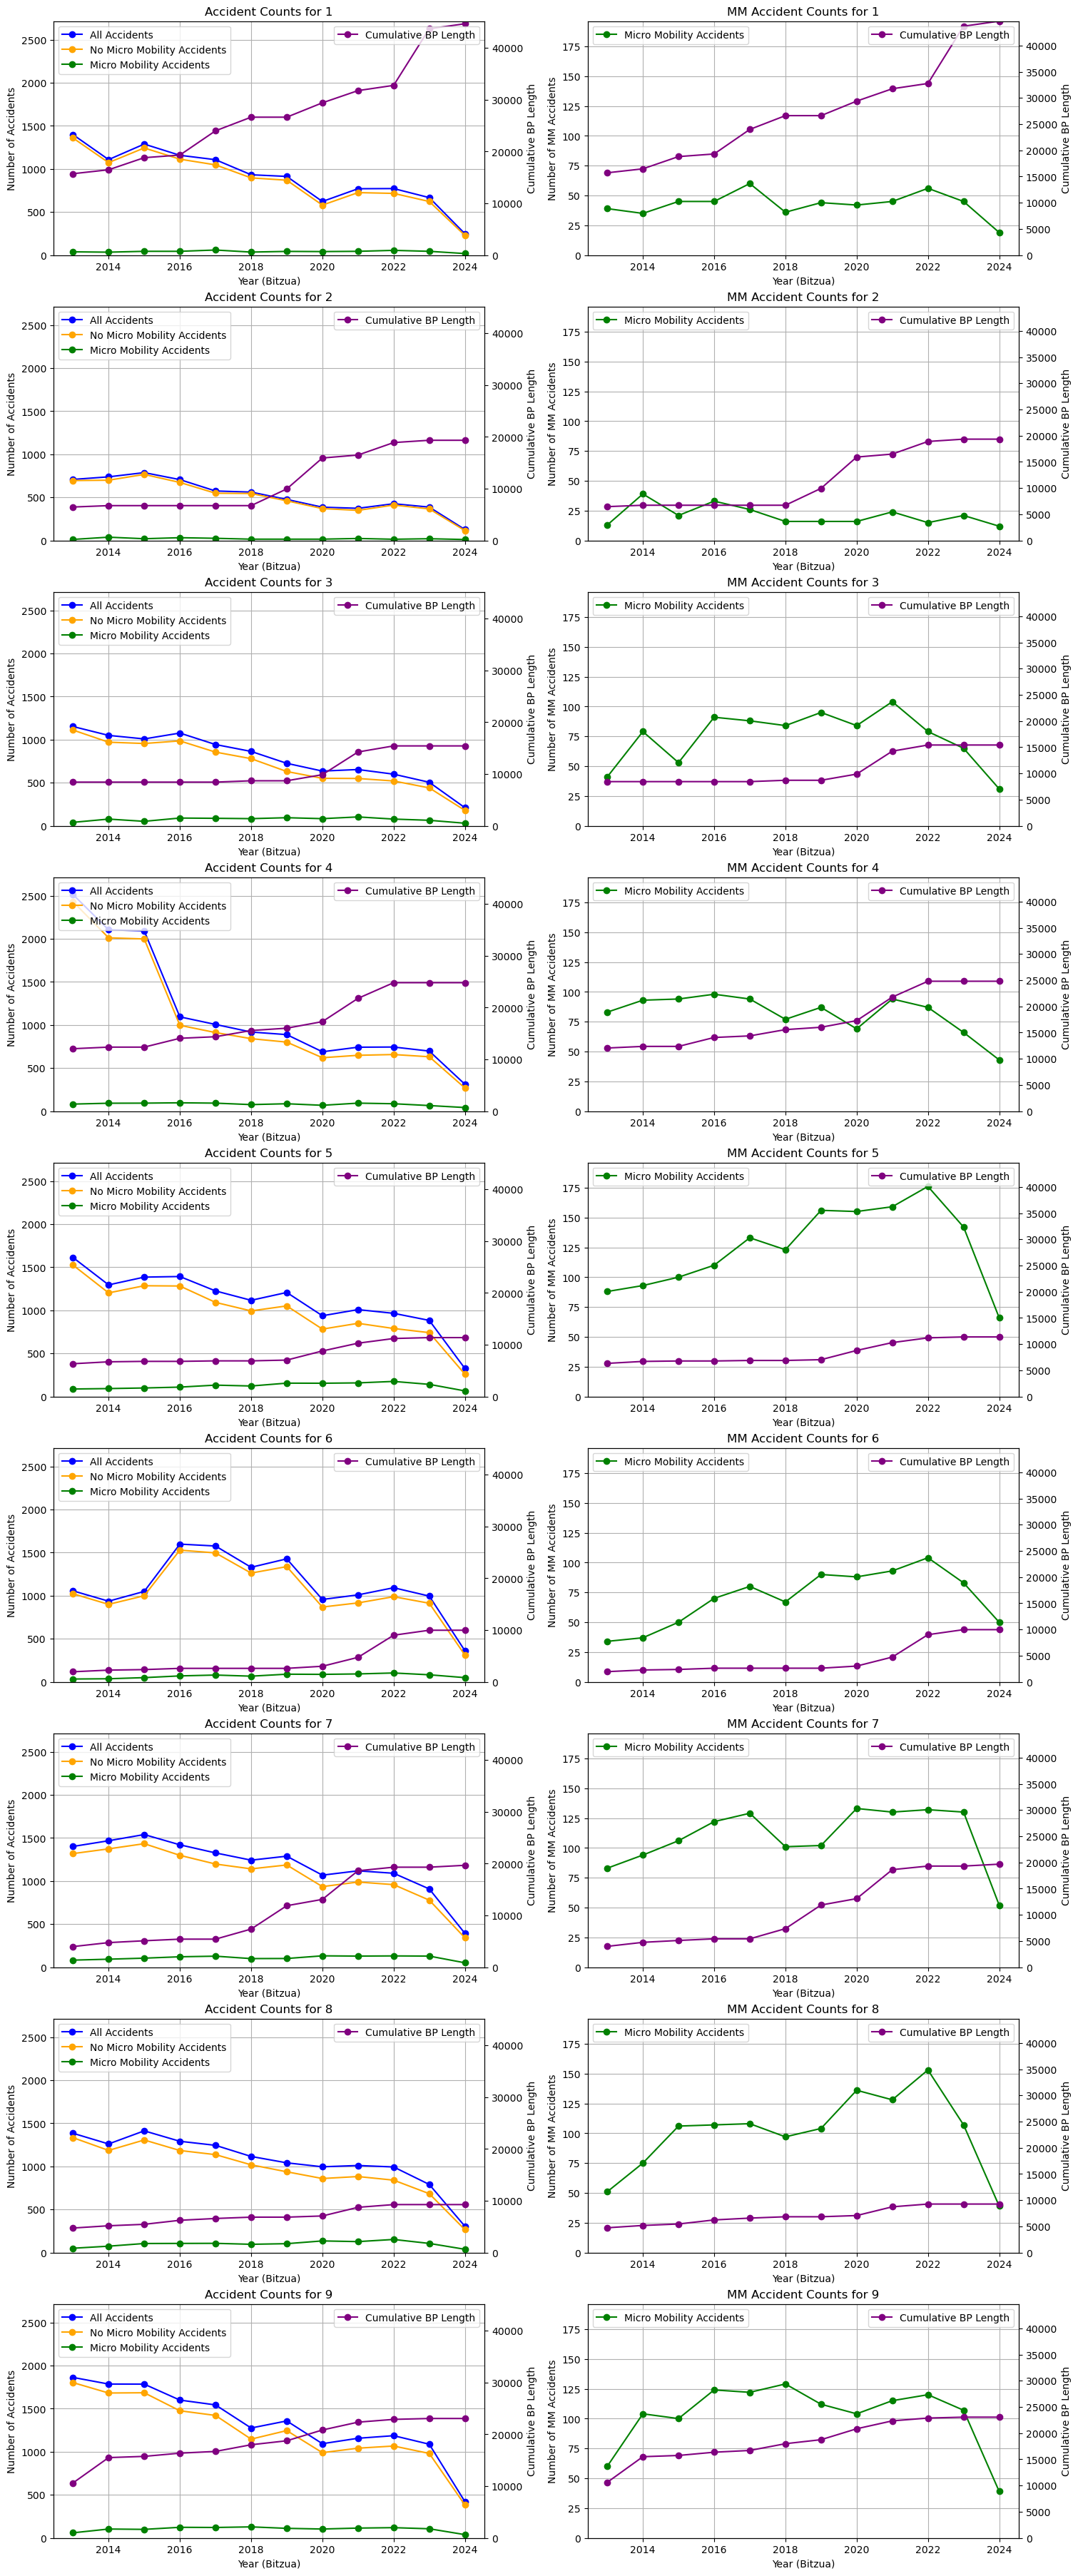

In [88]:
import matplotlib.pyplot as plt

# Calculate maximum values for y-axis limits
max_all_accidents = bp_krova_filtered['all_acc_cnt'].max()
max_mm_accidents = bp_krova_filtered['mm_acc_cnt'].max()
max_cum_bp_length = bp_krova_filtered['cum_bp_length'].max()

# Prepare the figure with 9 rows and 2 columns
fig, axs = plt.subplots(9, 2, figsize=(15, 36), constrained_layout=True)

# Flatten the 2D grid of axs for easy iteration
axs = axs.flatten()

# Colors for different types of accidents
colors = ['blue', 'orange', 'green']
labels = ['All Accidents', 'No Micro Mobility Accidents', 'Micro Mobility Accidents']

# Iterate over each unique city quarter
for i, quarter in enumerate(bp_krova_filtered.index.get_level_values('krova').unique()):
    if i < len(axs) // 2:  # Ensure we don't exceed the number of available subplots
        # Extract data for this city quarter
        data = bp_krova_filtered.loc[quarter]
        
        # First plot in the row
        ax1 = axs[2 * i]
        ax1.plot(data.index.get_level_values('bitzua'), data['all_acc_cnt'], 'o-', color=colors[0], label=labels[0])
        ax1.plot(data.index.get_level_values('bitzua'), data['no_mm_acc_cnt'], 'o-', color=colors[1], label=labels[1])
        ax1.plot(data.index.get_level_values('bitzua'), data['mm_acc_cnt'], 'o-', color=colors[2], label=labels[2])
        ax1.set_title(f'Accident Counts for {quarter}')
        ax1.set_xlabel('Year (Bitzua)')
        ax1.set_ylabel('Number of Accidents')
        ax1.set_ylim(0, max_all_accidents + 200)
        ax1.legend(loc='upper left')
        ax1.grid(True)
        # Create a secondary y-axis for cum_bp_length
        ax1_right = ax1.twinx()
        ax1_right.plot(data.index.get_level_values('bitzua'), data['cum_bp_length'], 'o-', color='purple', label='Cumulative BP Length')
        ax1_right.set_ylabel('Cumulative BP Length')
        ax1_right.set_ylim(0, max_cum_bp_length + 500)
        ax1_right.legend(loc='upper right')
        
        # Second plot in the row
        ax2 = axs[2 * i + 1]
        ax2.plot(data.index.get_level_values('bitzua'), data['mm_acc_cnt'], 'o-', color=colors[2], label=labels[2])
        ax2.set_title(f'MM Accident Counts for {quarter}')
        ax2.set_xlabel('Year (Bitzua)')
        ax2.set_ylabel('Number of MM Accidents')
        ax2.set_ylim(0, max_mm_accidents + 20)
        ax2.legend(loc='upper left')
        ax2.grid(True)

        # Create a secondary y-axis for cum_bp_length
        ax2_right = ax2.twinx()
        ax2_right.plot(data.index.get_level_values('bitzua'), data['cum_bp_length'], 'o-', color='purple', label='Cumulative BP Length')
        ax2_right.set_ylabel('Cumulative BP Length')
        ax2_right.set_ylim(0, max_cum_bp_length)
        ax2_right.legend(loc='upper right')

# Hide any unused subplots
for j in range(2 * i + 2, len(axs)):
    fig.delaxes(axs[j])

# Display the plot
plt.show()
